In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[Blog](https://mohitatgithub.github.io/2018-03-28-MNIST-Image-Classification-with-CNN-&-Keras/#:~:text=So%20far%20Convolutional%20Neural%20Networks%20%28CNN%29%20give%20best,given%20here.%20Best%20accuracy%20achieved%20is%2099.79%25.%20)

# MNIST Dataset

In [2]:
data=tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
np.max(x_train)

255

In [6]:
np.min(x_train)

0

### Normalization: Min-max

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
np.unique(y_train)
# 10 different classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

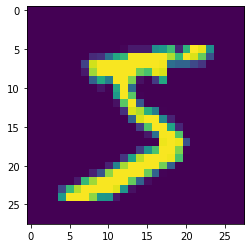

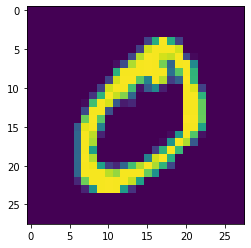

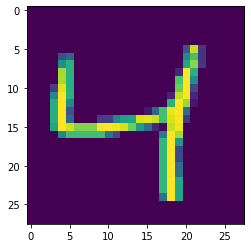

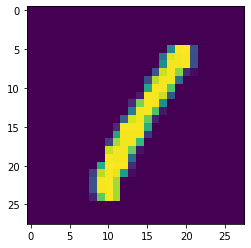

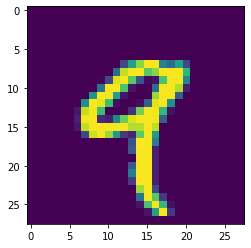

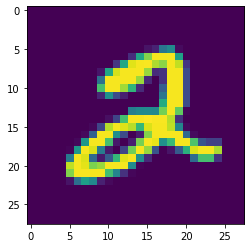

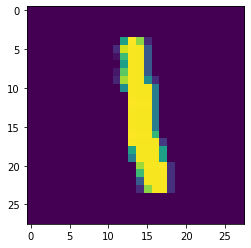

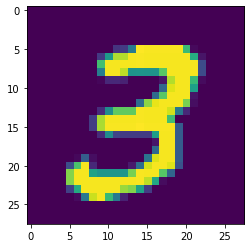

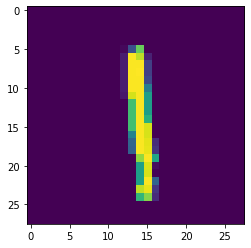

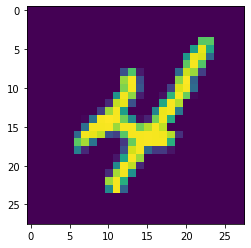

In [9]:
for i in np.unique(y_train):
     plt.imshow(x_train[i])
     plt.show()

### Architechture 1

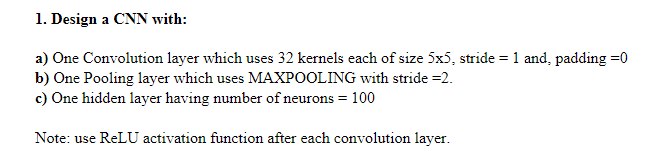

In [10]:
model=tf.keras.Sequential()

model.add(tf.keras.Input((28,28,1)))
model.add(tf.keras.layers.Conv2D(32, kernel_size= (5,5), activation = "relu" , padding = "valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides =  (2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer1"))
model.add(tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer"))

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 100)               460900    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________________________________

In [12]:
batch_size=32
epochs=15

history = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 17s 4ms/step - loss: 0.1494 - accuracy: 0.9547 - val_loss: 0.0570 - val_accuracy: 0.9850
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0470 - val_accuracy: 0.9870
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0503 - val_accuracy: 0.9858
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0510 - val_accuracy: 0.9857
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0459 - val_accuracy: 0.9892
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.0460 - val_accuracy: 0.9883
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0551 - val_accuracy

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9866


[0.07346189767122269, 0.9865999817848206]

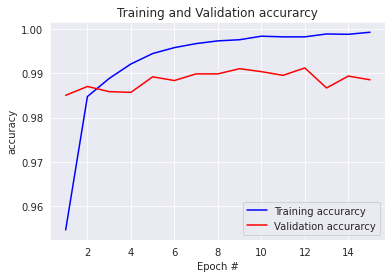

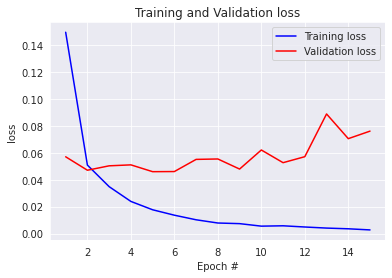

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()


In [15]:
y_pred= model.predict(x_test)
y_pred

array([[2.7207529e-21, 2.4516350e-15, 1.8056678e-12, ..., 1.0000000e+00,
        9.4000714e-18, 2.5186325e-14],
       [1.8219353e-15, 1.4267575e-14, 1.0000000e+00, ..., 1.1192413e-24,
        7.1401471e-21, 3.1552522e-27],
       [2.1827966e-09, 9.9999857e-01, 8.8717790e-11, ..., 1.7142504e-10,
        1.3931709e-06, 7.1200420e-12],
       ...,
       [9.6901957e-22, 1.1282918e-11, 1.8244979e-19, ..., 2.4397053e-13,
        3.2820226e-14, 1.0174157e-14],
       [3.2127457e-22, 1.5831144e-27, 1.6764789e-25, ..., 5.7702960e-23,
        4.8601298e-17, 3.1786928e-25],
       [1.0231137e-14, 3.7322376e-17, 1.6790705e-18, ..., 1.2889863e-31,
        1.1236057e-15, 1.3044422e-19]], dtype=float32)

### Architechture 2

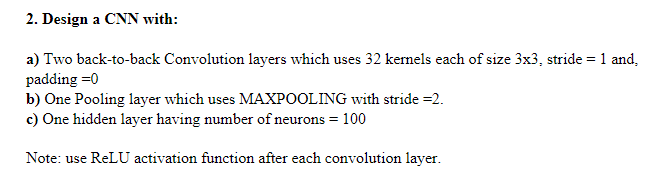

In [16]:
model2=tf.keras.Sequential()

model2.add(tf.keras.Input((28,28,1)))
model2.add(tf.keras.layers.Conv2D(32, kernel_size= (3,3), activation = "relu" , padding = "valid"))
model2.add(tf.keras.layers.Conv2D(32, kernel_size= (3,3), activation = "relu" , padding = "valid"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides =  (2, 2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer1"))
model2.add(tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer"))

In [17]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 100)               460900    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                      

In [18]:
batch_size=32
epochs=15

history2 = model2.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1280 - accuracy: 0.9610 - val_loss: 0.0451 - val_accuracy: 0.9867
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0578 - val_accuracy: 0.9855
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 0.0426 - val_accuracy: 0.9880
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0411 - val_accuracy: 0.9890
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0130 - accuracy: 0.9954 - val_loss: 0.0399 - val_accuracy: 0.9900
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0396 - val_accuracy: 0.9905
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0505 - val_accuracy:

In [19]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0581 - accuracy: 0.9887


[0.058113403618335724, 0.9886999726295471]

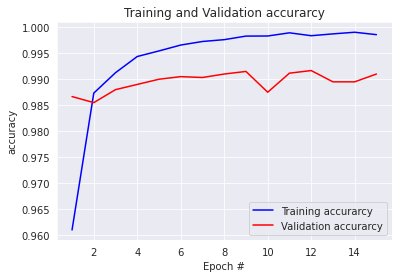

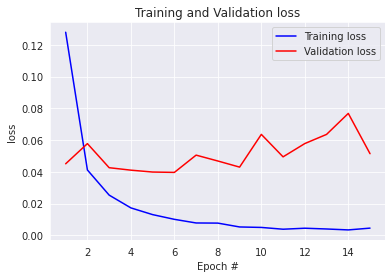

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()


In [21]:
y_pred= model2.predict(x_test)
y_pred

array([[1.1527514e-21, 1.5139925e-13, 1.0678911e-14, ..., 1.0000000e+00,
        6.9636969e-18, 1.1603473e-16],
       [6.7958571e-15, 6.5031537e-16, 1.0000000e+00, ..., 7.8505510e-25,
        4.3000783e-23, 1.1435811e-19],
       [3.3405527e-12, 1.0000000e+00, 8.6012209e-13, ..., 4.5931273e-11,
        8.6174617e-13, 1.7201572e-15],
       ...,
       [2.7317803e-26, 3.8488719e-19, 1.1062004e-19, ..., 7.4460888e-18,
        9.4016242e-16, 1.6598325e-17],
       [4.2332543e-21, 2.9284732e-24, 7.6574931e-26, ..., 7.4523569e-21,
        1.4500580e-10, 6.5676855e-20],
       [4.2073723e-11, 2.4022245e-17, 1.0738569e-11, ..., 2.8789767e-21,
        7.2261160e-14, 1.9587052e-14]], dtype=float32)

### Architechture 3

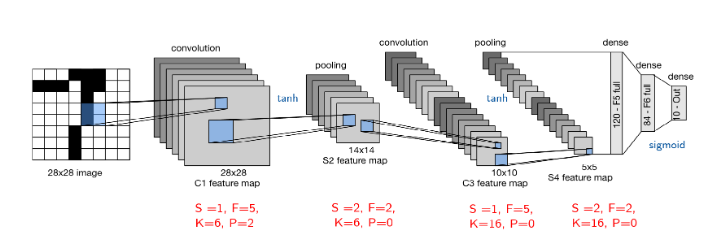

In [22]:
lenet5 = tf.keras.Sequential()
lenet5.add(tf.keras.Input(shape=(28,28,1)))
lenet5.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', padding="same", name="convolutionalLayer1"))
lenet5.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, name="averagePooling1"))
lenet5.add(tf.keras.layers.Conv2D(16,kernel_size=(5, 5), activation='tanh', name="convolutionalLayer2"))
lenet5.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, name="averagePooling2"))
lenet5.add(tf.keras.layers.Flatten(name="input"))
lenet5.add(tf.keras.layers.Dense(units=120, activation='tanh', name="hiddenLayer1"))
lenet5.add(tf.keras.layers.Dense(units=84, activation='tanh', name="hiddenLayer2"))
lenet5.add(tf.keras.layers.Dense(units=10, activation = 'softmax', name="Output"))


In [23]:
lenet5.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
lenet5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolutionalLayer1 (Conv2D  (None, 28, 28, 6)        156       
 )                                                               
                                                                 
 averagePooling1 (AveragePoo  (None, 14, 14, 6)        0         
 ling2D)                                                         
                                                                 
 convolutionalLayer2 (Conv2D  (None, 10, 10, 16)       2416      
 )                                                               
                                                                 
 averagePooling2 (AveragePoo  (None, 5, 5, 16)         0         
 ling2D)                                                         
                                                                 
 input (Flatten)             (None, 400)              

In [24]:
batch_size=32
epochs=15
history3=lenet5.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2549 - accuracy: 0.9234 - val_loss: 0.1319 - val_accuracy: 0.9614
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0996 - accuracy: 0.9701 - val_loss: 0.0821 - val_accuracy: 0.9754
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0675 - accuracy: 0.9790 - val_loss: 0.0706 - val_accuracy: 0.9792
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9842 - val_loss: 0.0604 - val_accuracy: 0.9818
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0628 - val_accuracy: 0.9823
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0618 - val_accuracy: 0.9837
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0631 - val_accuracy:

In [25]:
lenet5.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0579 - accuracy: 0.9853


[0.05785944685339928, 0.9853000044822693]

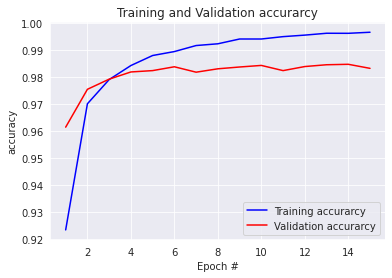

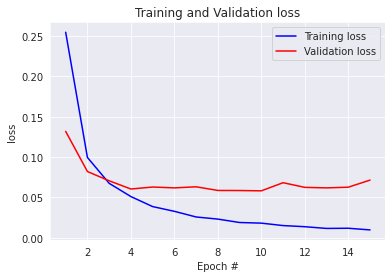

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()


In [27]:
y_pred_lenet5 = lenet5.predict(x_test)
y_pred_lenet5

array([[2.4823772e-09, 9.3827524e-09, 9.6716114e-08, ..., 9.9999952e-01,
        2.8391034e-09, 3.2433630e-07],
       [6.2093292e-08, 5.2670777e-07, 9.9999940e-01, ..., 4.8437677e-12,
        1.1250329e-08, 4.9261029e-12],
       [2.6293985e-09, 9.9999905e-01, 6.9884711e-09, ..., 3.4893535e-08,
        2.0082928e-07, 5.1195610e-12],
       ...,
       [2.2164993e-12, 1.7207677e-08, 5.1690670e-09, ..., 1.6573378e-07,
        7.3231109e-07, 1.9682782e-05],
       [9.4648034e-10, 3.8748489e-09, 3.4284838e-12, ..., 2.3200615e-09,
        1.0158967e-04, 1.1261530e-10],
       [4.8590919e-06, 1.1756037e-09, 3.5280775e-07, ..., 4.9925424e-12,
        5.0722768e-08, 1.5184575e-08]], dtype=float32)

- Architechture 1 shows the highest training accuracy of 99.92%
- Architechture 2 shows the highest testing accuracy of 99.87%
### All the 3 Architechtures almost shows the same test and training accuracy